In [1]:
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

In [3]:
np.set_printoptions(precision=3, suppress=True)


In [4]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
print(tf.__version__)

2024-09-08 15:49:06.912747: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


In [5]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [6]:
dataset = raw_dataset.copy()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [7]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
#dropna removes row and collumns with NaN data 
dataset = dataset.dropna(how='any') #how='all' only removes the row if all data is NaN
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [9]:
#map the atribute 'origin' from [1,2,3] to [USA, Europe, Japan]
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

/tmp/ipykernel_210222/3901916057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


get_dummies: it converts collumns into something that ML can learn from  
Example:

In [10]:
df = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']
})

# Get dummies for the 'Color' column
df_dummies = pd.get_dummies(df, columns=['Color'],prefix='', prefix_sep='')
df

,Color
0,Red
1,Blue
2,Green
3,Blue
4,Red


In [11]:
df_dummies

,Blue,Green,Red
0,False,False,True
1,True,False,False
2,False,True,False
3,True,False,False
4,False,False,True


In [12]:
#why did we map 1 2 3 to names if they will transformed into 1 2 3 back wirh get_dummies anyway
dataset= pd.get_dummies(dataset, columns=['Origin'],prefix='',prefix_sep='')
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


split data

In [13]:
train_data= dataset.sample(frac=0.8)#take %80 percent of data as test
test_data= dataset.drop(train_data.index)#take the rest as testing data

seaborn function to plot MPG as afunction of other parameters

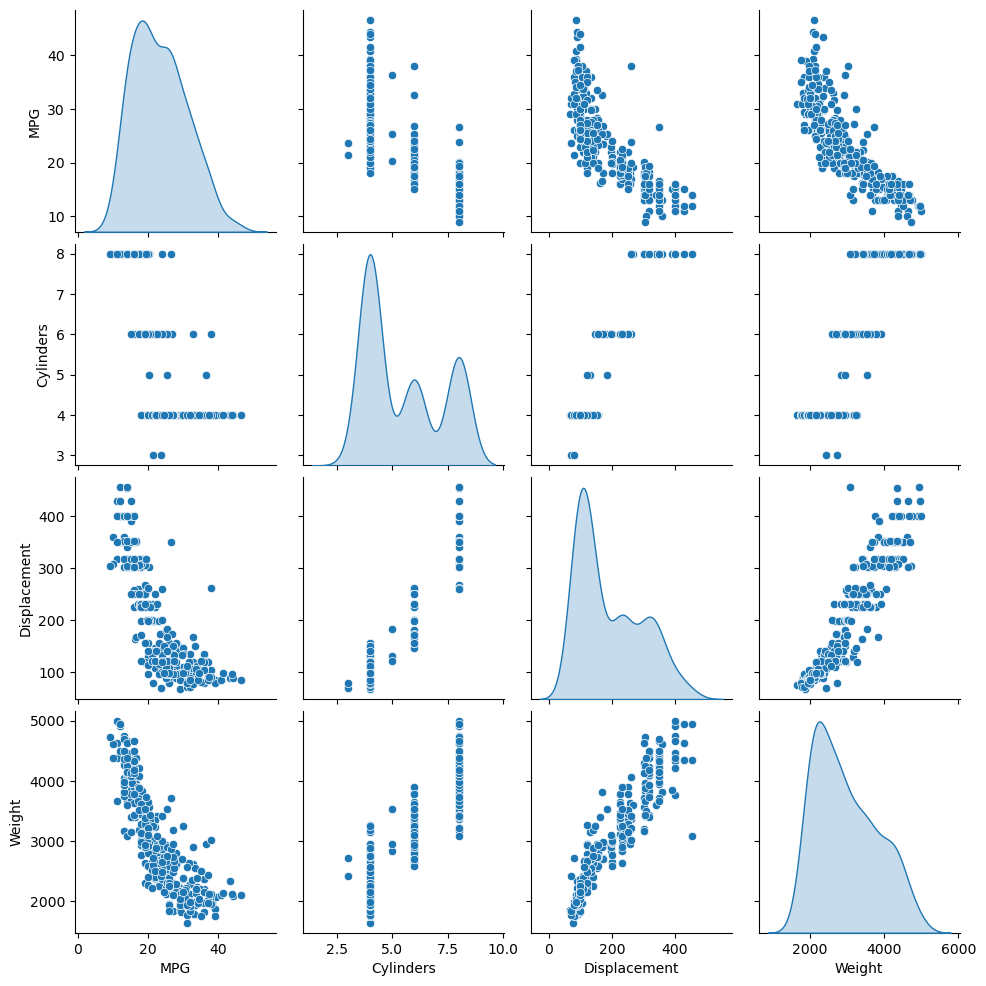

In [14]:
sns.pairplot(train_data[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [15]:
train_data.describe().transpose()#describe gives statistics about data

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.428981,7.697306,9.0,17.500,22.45,29.000,46.6
Cylinders,314.0,5.474522,1.705372,3.0,4.000,4.00,8.000,8.0
Displacement,314.0,193.106688,102.717978,68.0,98.750,151.00,265.750,455.0
Horsepower,314.0,103.910828,37.578438,46.0,75.250,94.50,128.000,225.0
Weight,314.0,2971.414013,838.403767,1649.0,2231.000,2803.50,3612.000,4997.0
Acceleration,314.0,15.593949,2.747417,8.0,13.925,15.50,17.075,24.8
Model Year,314.0,75.955414,3.629563,70.0,73.000,76.00,79.000,82.0


In [16]:
train_features = train_data.copy()
test_features = test_data.copy()

train_labels= train_features.pop('MPG')
test_lables= test_features.pop('MPG')

In [35]:
train_labels

12     15.0
285    17.0
130    26.0
198    33.0
333    32.7
       ... 
136    16.0
204    32.0
114    26.0
188    16.0
196    24.5
Name: MPG, Length: 314, dtype: float64

In [17]:
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
12,8,400.0,150.0,3761.0,9.5,70,False,False,True
285,8,305.0,130.0,3840.0,15.4,79,False,False,True
130,4,122.0,80.0,2451.0,16.5,74,False,False,True
198,4,91.0,53.0,1795.0,17.4,76,False,True,False
333,6,168.0,132.0,2910.0,11.4,80,False,True,False
...,...,...,...,...,...,...,...,...,...
136,8,302.0,140.0,4141.0,14.0,74,False,False,True
204,4,85.0,70.0,1990.0,17.0,76,False,True,False
114,4,98.0,90.0,2265.0,15.5,73,True,False,False
188,8,318.0,150.0,4190.0,13.0,76,False,False,True


normalization 

In [18]:
train_data.describe().transpose()[['mean','std']]

,mean,std
MPG,23.428981,7.697306
Cylinders,5.474522,1.705372
Displacement,193.106688,102.717978
Horsepower,103.910828,37.578438
Weight,2971.414013,838.403767
Acceleration,15.593949,2.747417
Model Year,75.955414,3.629563


In [19]:
normalizer= tf.keras.layers.Normalization(axis=-1)

In [20]:
X = train_features.astype(np.float32)
normalizer.adapt(np.array(X))

2024-09-08 15:49:12.205867: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [21]:
print(normalizer.mean.numpy())

[[   5.475  193.107  103.911 2971.414   15.594   75.955    0.169    0.207
     0.624]]


In [22]:
first= np.array(train_features[:1].astype(np.float32))

with np.printoptions(precision=3, suppress=True):
    print('First example:', first,'\n')
    print('normalized:', normalizer(first).numpy())


First example: [[   8.   400.   150.  3761.     9.5   70.     0.     0.     1. ]] 

normalized: [[ 1.483  2.017  1.228  0.943 -2.222 -1.643 -0.451 -0.511  0.776]]


Linear regression from horsepower to MPG

In [23]:
horsepower = np.array(train_features['Horsepower'])
horsepower

array([150., 130.,  80.,  53., 132.,  92., 110.,  88.,  97.,  68.,  85.,
       139.,  88., 133.,  68.,  97.,  65., 170., 145., 105.,  53., 150.,
        84.,  75.,  92., 180., 103., 115., 105., 110.,  84.,  88.,  95.,
        97., 105., 142., 190.,  70.,  95., 208., 150.,  90.,  85.,  80.,
        84., 160.,  88., 100.,  95.,  88., 115.,  90.,  75.,  67.,  98.,
       150.,  70.,  67.,  70.,  60.,  79.,  94., 167.,  69.,  85., 120.,
       140., 110., 102., 165.,  80.,  54.,  72., 130.,  88., 112.,  95.,
        78., 110.,  60., 140.,  67.,  70., 210., 150., 110., 165.,  95.,
       150., 139., 110.,  90.,  71.,  90., 225., 180., 150., 129.,  70.,
        71.,  68.,  86., 105., 100.,  46.,  88.,  83.,  90., 170., 150.,
        71.,  76., 105.,  49.,  58.,  67.,  77., 110.,  78.,  75.,  97.,
       138.,  71., 175., 122.,  62., 150.,  92.,  95., 105.,  64., 120.,
       145., 112.,  48., 100., 135., 140., 175., 100.,  75., 100., 150.,
        88.,  88., 150., 190.,  65.,  72.,  88.,  6

In [24]:
horsepower_normalizer = layers.Normalization(input_shape=[1], axis=None)
horsepower_normalizer.adapt(horsepower)

In [25]:
horsepower_model = tf.keras.Sequential([horsepower_normalizer,layers.Dense(units=1)])
horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [26]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 58ms/step


array([[ 0.642],
       [ 0.363],
       [-0.333],
       [-0.709],
       [ 0.391],
       [-0.166],
       [ 0.085],
       [-0.222],
       [-0.096],
       [-0.5  ]], dtype=float32)

In [27]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [28]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()    

CPU times: user 3 s, sys: 382 ms, total: 3.38 s
Wall time: 2.88 s


,loss,val_loss,epoch
95,3.657468,3.452832,95
96,3.659261,3.458965,96
97,3.658634,3.441617,97
98,3.659343,3.436397,98
99,3.657653,3.453124,99


In [29]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

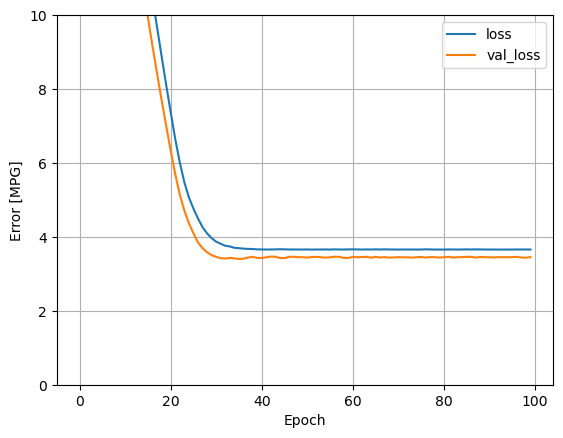

In [30]:
plot_loss(history)

In [31]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_lables, verbose=0)

In [38]:
test_results

{'horsepower_model': 4.654910564422607}

In [36]:
x = tf.linspace(0.0, 250, 251)

y = horsepower_model.predict(x)

def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

8/8 [==============================] - 0s 1ms/step


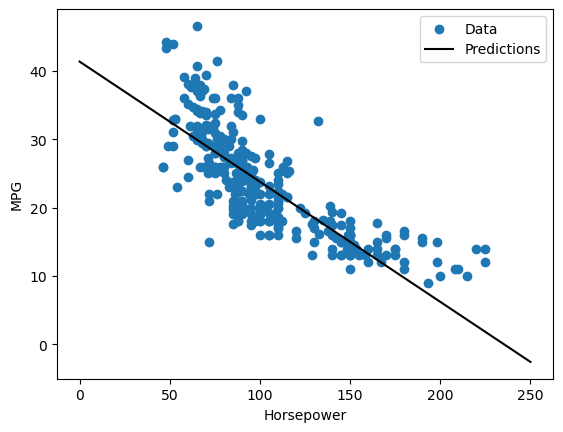

In [37]:
plot_horsepower(x, y)